In [28]:
from montecarlo import MonteCarlo
from CIRModel import BasicCIRModel
from ECIR_new import ECIRModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Load the DGS_30 data
dgs_30_data = pd.read_csv('Data Folder/DGS_30.csv')

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

data=dgs_30_data

dates = data.loc[data.index >= '2024-03-19'].index
years = [1, 2, 

params_ecir = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321       
}

params_cir = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

In [40]:
def create_model(mod, data):
    models = []
    for column in data.columns:
            if 'DGS' in column:                    
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                models.append(MonteCarlo(mod, data[column][0]/100, maturity, 255*maturity, 100))
    return models

In [41]:
cir = create_model(BasicCIRModel(**params_cir), data)
ecir = create_model(ECIRModel(**params_ecir), data)

In [50]:
prices_cir = pd.DataFrame()
for model in cir:
    prices_cir[model] = model.price_estimates()[2]

prices_cir.columns = data.columns

In [51]:
prices_ecir = pd.DataFrame()
for model in ecir:
    prices_ecir[model] = model.price_estimates()[2]

prices_ecir.columns = data.columns

In [53]:
avg_cir = []
err_cir = []
for col in prices_cir:
    avg_cir.append(np.mean(prices_cir[col]))
    err_cir.append(np.std(prices_cir[col]))

avg_ecir = []
err_ecir = []
for col in prices_ecir:
    avg_ecir.append(np.mean(prices_ecir[col]))
    err_ecir.append(np.std(prices_ecir[col]))

Text(0, 0.5, 'Price')

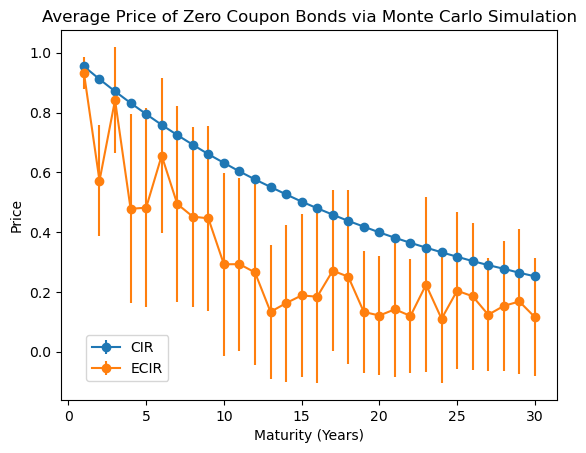

In [57]:
plt.errorbar(np.arange(1, 31), avg_cir, yerr = err_cir, label = 'CIR', marker = 'o')
plt.errorbar(np.arange(1, 31), avg_ecir, yerr = err_ecir, label = 'ECIR', marker = 'o')
plt.legend(loc = (0.05, 0.05))
plt.title('Average Price of Zero Coupon Bonds via Monte Carlo Simulation')
plt.xlabel('Maturity (Years)')
plt.ylabel('Price')

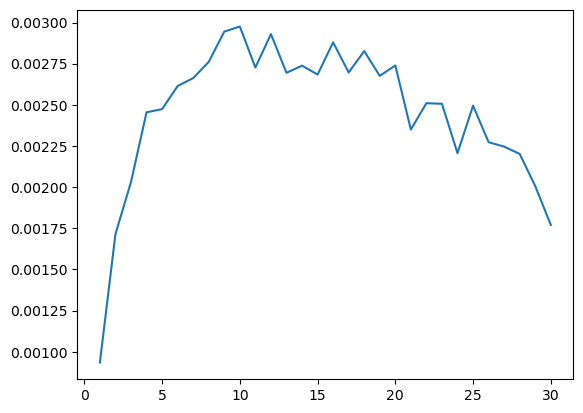

In [95]:
plt.plot(np.arange(1, 31), err_cir)
#plt.plot(np.arange(1, 31), err_ecir)

In [81]:
cir_paths = pd.DataFrame()

for i in range(len(cir)):
    paths = cir[i].paths()
    for j in range(len(paths)):
        paths[j] = np.mean(paths[j])
    cir_paths[data.columns[i]] = paths

In [82]:
ecir_paths = pd.DataFrame()

for i in range(len(ecir)):
    paths = ecir[i].paths()
    for j in range(len(paths)):
        paths[j] = np.mean(paths[j])
    ecir_paths[data.columns[i]] = paths

In [83]:
avg_cir_rate = []
err_cir_rate = []
for col in cir_paths:
    avg_cir_rate.append(np.mean(cir_paths[col]))
    err_cir_rate.append(np.std(cir_paths[col]))

avg_ecir_rate = []
err_ecir_rate = []
for col in ecir_paths:
    avg_ecir_rate.append(np.mean(ecir_paths[col]))
    err_ecir_rate.append(np.std(ecir_paths[col]))

Text(0, 0.5, 'Yield Rate')

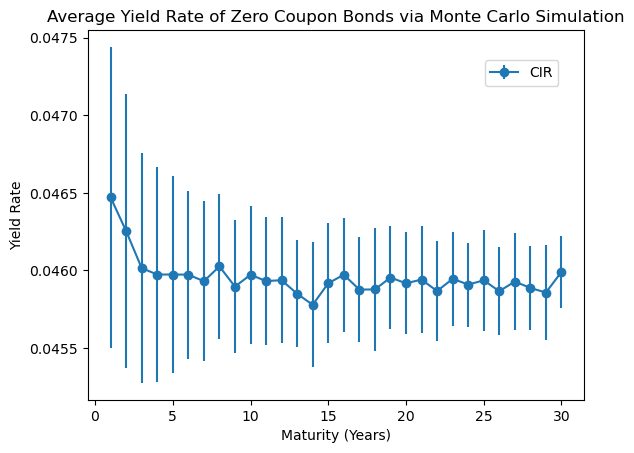

In [92]:
plt.errorbar(np.arange(1, 31), avg_cir_rate, yerr = err_cir_rate, label = 'CIR', marker = 'o')
#plt.errorbar(np.arange(1, 31), avg_ecir_rate, yerr = err_ecir_rate, label = 'ECIR', marker = 'o')
plt.legend(loc = (0.8, 0.85))
plt.title('Average Yield Rate of Zero Coupon Bonds via Monte Carlo Simulation')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield Rate')

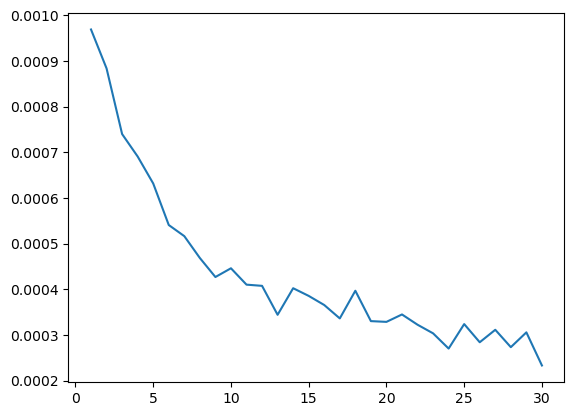

In [91]:
plt.plot(np.arange(1, 31), err_cir_rate)
#plt.plot(np.arange(1, 31), err_ecir_rate)